## Consigna 1er Parcial Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Junio 2024.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Campo debido a una esfera maciza o hueca con carga
Se puede definir la magnitud de un campo eléctrico debido a una esfera con carga $Q$ a una distancia $r$ como <br><br>
$E = \frac{1}{4\pi\epsilon_{0}}\frac{Q}{r^{2}}$<br><br>
Si queremos obtener el campo producido por cada diferencial de carga que conforma nuestra esfera, recordando que el campo eléctrico es una magnitud vectorial <br><br>
$d\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}}\frac{dq}{|\vec{r}|^{2}}\^{r}$<br><br>
Siendo $\vec{r}=\vec{r_0}-\vec{r_q}$, donde $\vec{r_0}$ es la distancia de observación y $\vec{r_q}$ la posición de la carga respecto al centro.<br>
Si sumamos todos los $d\vec{E}$ producidos por nuestras cargas, obtendremos el campo eléctrico total $\vec{E}$ y podremos contrastarlo contra su magnitud.<br>
Suponiendo la carga total de la esfera es $Q = 3\times10^{-6}C$ y el radio de la misma $R = 0.01m$<br>
 

Para resolver esto por método de Montecarlo, voy a crear 1000 cargas $dq$


In [2]:
k=9e9
Q = 3e-6 # carga total de la esfera
R = 0.01 # radio de la esfera
n = 1000 # n: cantidad de dq
dq = Q / n
ro = np.array([5*R,0,0]) # posición del observador, mientras mas lejos esté, mejor me vá a dar el resultado
Et= k * Q / np.linalg.norm(ro)**2 # solucion teórica!!! (para comparar al final)

def E(rq,ro,q):
    # rq: posición de la carga
    # ro: distancia del observador 
    # q: carga
    # recordemos que el campo debido a una carga dE es una unidad vectorial

    r = ro - rq
    r_unitario = r / np.linalg.norm(r)
    Eq = (k*q/np.linalg.norm(r)**2)*r_unitario
    return Eq


### Para la esfera maciza

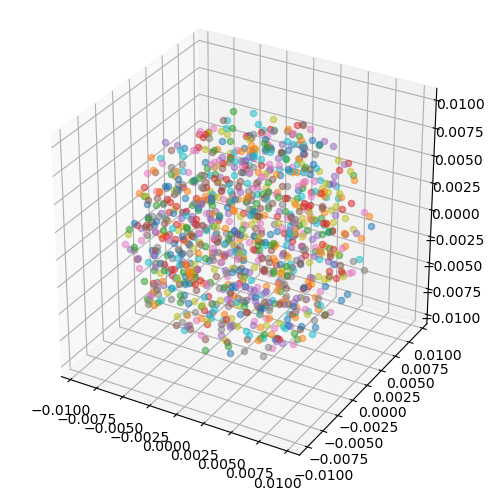

Campo debido a una esfera maciza con carga solución MC: 10707368.61 N/C
Campo debido a una esfera maciza con carga solución teórica: 10800000.0 N/C


In [3]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(aspect = 'equal' , projection='3d')
i=0
Es = np.array([0,0,0]) #campo eléctrico debido a la esfera (donde iremos sumando los dE debidos a cada dQ)

while i < n:
    # para la posicion de 'dq' tengo que generar dos numeros random entre -1 y 1 para mis coordenadas x, y,z.
    rx = R *(np.random.random() * 2-1)
    ry = R *(np.random.random() * 2-1)
    rz = R *(np.random.random() * 2-1)
    #creo el vector posición
    rt = np.array([rx,ry,rz])
    if np.linalg.norm(rt) <= R: # solo la voy a tener en cuenta si el modulo de la posición es menor al radio de la esfera (es decir, la carga está dentro de ella)
        ax.scatter(rt[0],rt[1],rt[2], alpha=0.5)
        Es = Es + E(rt,ro,dq)
        i+=1
plt.show()
print(f'Campo debido a una esfera maciza con carga solución MC: {str(round(np.linalg.norm(Es),2))} N/C')
print(f'Campo debido a una esfera maciza con carga solución teórica: {str(round(Et,2))} N/C')

### Para una esfera Hueca
Ahora, si la carga estuviera distribuida por la superficie de una esfera hueca, veremos si da lo mismo.<br>
Para ello, primero definiremos el grosor de la superficie hueca y limitaremos nuestro loop para las n carguitas que estén en dicha superficie<br>


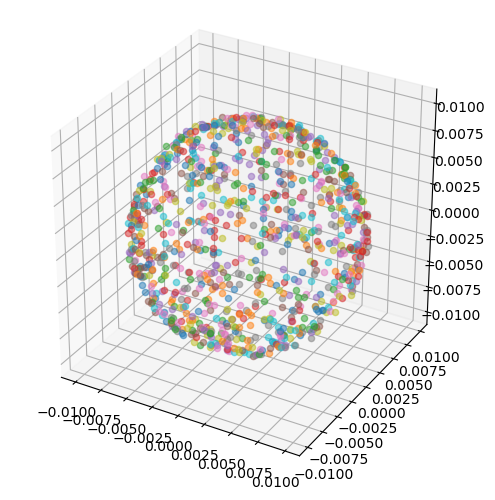

Campo debido a una esfera hueca con carga solución MC: 10668752.1 N/C
Campo debido a una esfera hueca con carga solución teórica: 10800000.0 N/C


In [4]:
dr = R / 20 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(aspect = 'equal' , projection='3d')
i=0
Es = np.array([0,0,0]) #campo eléctrico debido a la esfera (donde iremos sumando los dE debidos a cada dQ)

while i < n:
    # para la posicion de 'dq' tengo que generar dos numeros random entre -1 y 1 para mis coordenadas x, y,z.
    rx = R *(np.random.random() * 2-1)
    ry = R *(np.random.random() * 2-1)
    rz = R *(np.random.random() * 2-1)
    #creo el vector posición
    rt = np.array([rx,ry,rz])
    if np.linalg.norm(rt) >= R - dr and np.linalg.norm(rt) <= R : # solo la voy a tener en cuenta si el modulo de la posición es menor al radio de la esfera (es decir, la carga está dentro de ella)
        ax.scatter(rt[0],rt[1],rt[2], alpha=0.5)
        Es = Es + E(rt,ro,dq)
        i+=1
plt.show()
print(f'Campo debido a una esfera hueca con carga solución MC: {str(round(np.linalg.norm(Es),2))} N/C')
print(f'Campo debido a una esfera hueca con carga solución teórica: {str(round(Et,2))} N/C')